<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


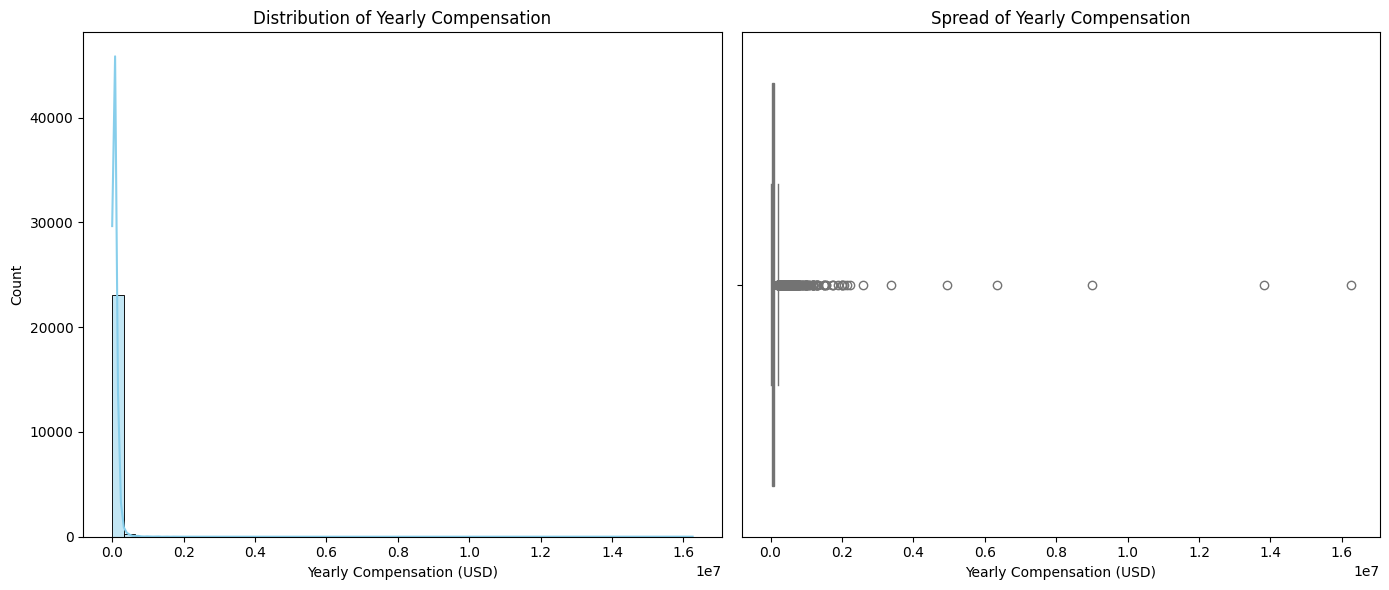

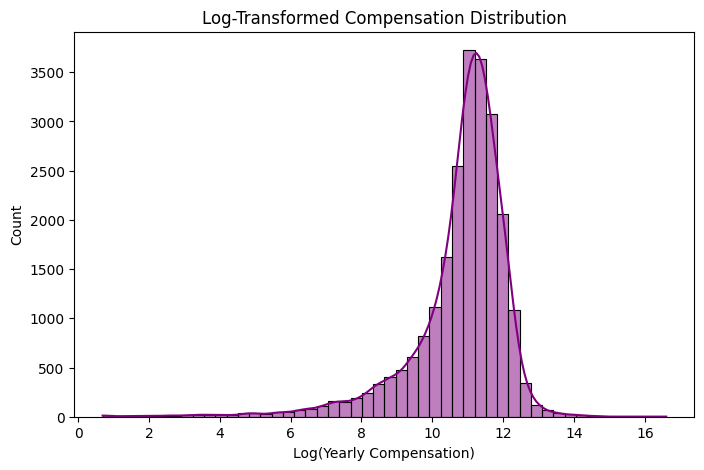

In [4]:
import numpy as np
plt.figure(figsize=(14, 6))

# Histogram with KDE
plt.subplot(1, 2, 1)
sns.histplot(df['ConvertedCompYearly'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Count')

# Box plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['ConvertedCompYearly'], color='lightgreen')
plt.title('Spread of Yearly Compensation')
plt.xlabel('Yearly Compensation (USD)')

plt.tight_layout()
plt.show()

# Log-transformed view for better visualization of distribution
plt.figure(figsize=(8, 5))
sns.histplot(np.log1p(df['ConvertedCompYearly']), bins=50, kde=True, color='purple')
plt.title('Log-Transformed Compensation Distribution')
plt.xlabel('Log(Yearly Compensation)')
plt.ylabel('Count')
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [5]:
# Filter full-time employees and calculate median compensation
ft_median = df[df['Employment'] == 'Employed, full-time']['ConvertedCompYearly'].median()
print(f"Median yearly compensation for full-time employees: ${ft_median:,.2f}")

# Additional statistics
ft_stats = df[df['Employment'] == 'Employed, full-time']['ConvertedCompYearly'].describe()
print("\nCompensation statistics for full-time employees:")
print(ft_stats[['count', 'mean', 'std', 'min', '50%', 'max']])

Median yearly compensation for full-time employees: $69,814.00

Compensation statistics for full-time employees:
count    1.758600e+04
mean     8.892111e+04
std      1.311224e+05
min      1.000000e+00
50%      6.981400e+04
max      9.000000e+06
Name: ConvertedCompYearly, dtype: float64


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



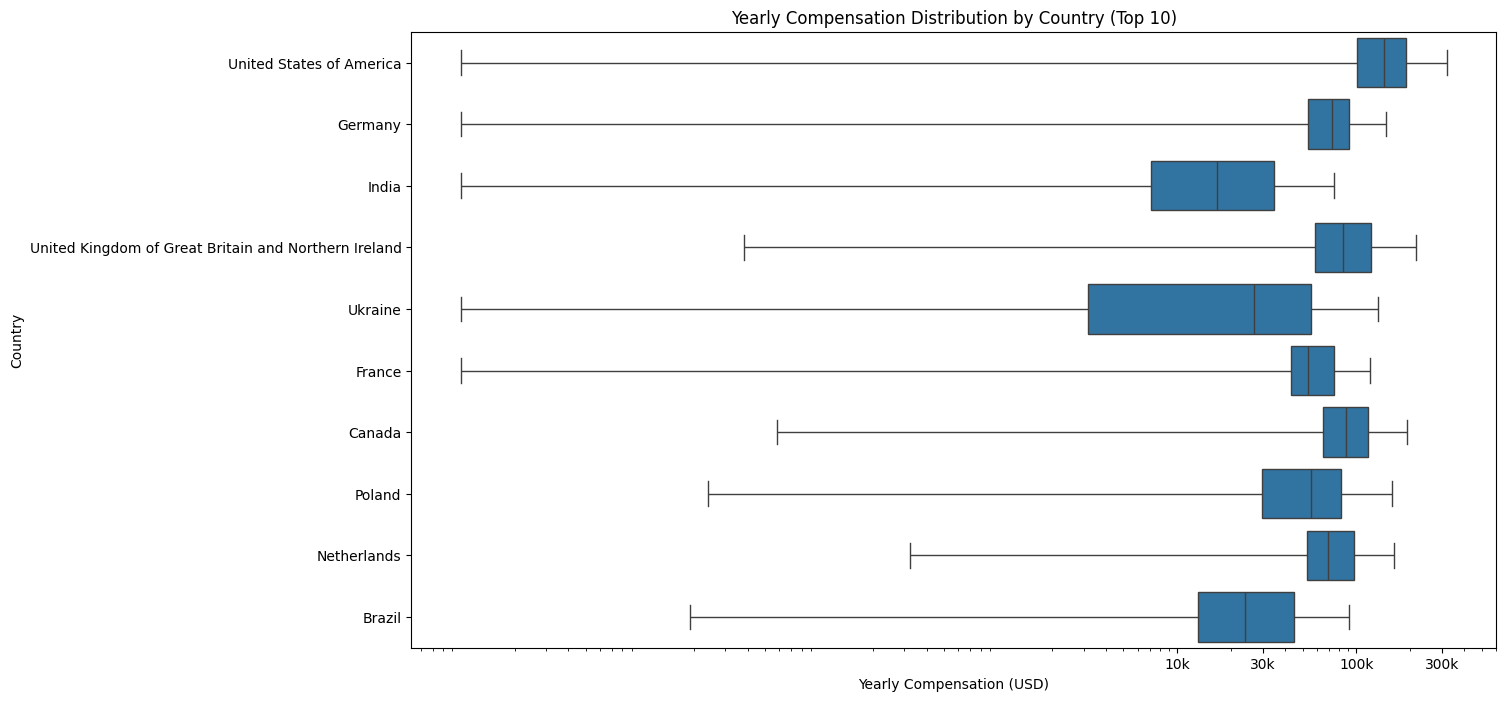

In [6]:
# Get top 10 countries by respondent count
top_countries = df['Country'].value_counts().head(10).index

plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df[df['Country'].isin(top_countries)],
    x='ConvertedCompYearly',
    y='Country',
    order=top_countries,
    showfliers=False  # Remove outliers for better visualization
)
plt.title('Yearly Compensation Distribution by Country (Top 10)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Country')
plt.xscale('log')  # Log scale for better visualization
plt.xticks([10000, 30000, 100000, 300000], ['10k', '30k', '100k', '300k'])
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


Original dataset size: 65437
Cleaned dataset size: 22457
Removed 42980 outliers (65.7% of data)


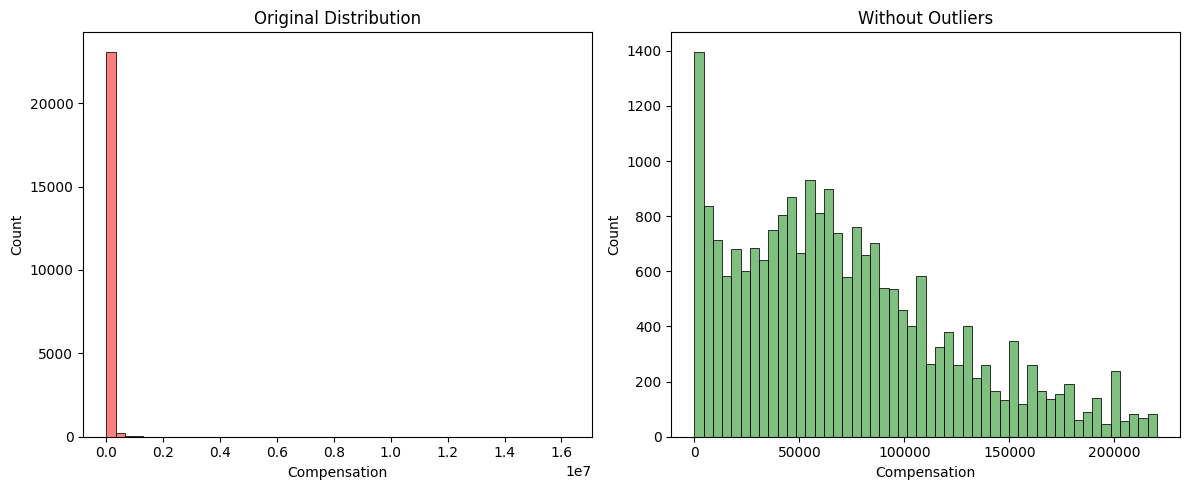

In [8]:
# Calculate IQR bounds
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create cleaned dataset
df_clean = df[
    (df['ConvertedCompYearly'] >= lower_bound) & 
    (df['ConvertedCompYearly'] <= upper_bound)
].copy()

# Verification (corrected f-string)
removed_count = len(df) - len(df_clean)
percentage_removed = (removed_count / len(df)) * 100
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_clean)}")
print(f"Removed {removed_count} outliers ({percentage_removed:.1f}% of data)")

# Compare distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['ConvertedCompYearly'], bins=50, color='red', alpha=0.5, label='Original')
plt.title('Original Distribution')
plt.xlabel('Compensation')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['ConvertedCompYearly'], bins=50, color='green', alpha=0.5, label='Cleaned')
plt.title('Without Outliers')
plt.xlabel('Compensation')

plt.tight_layout()
plt.show()

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


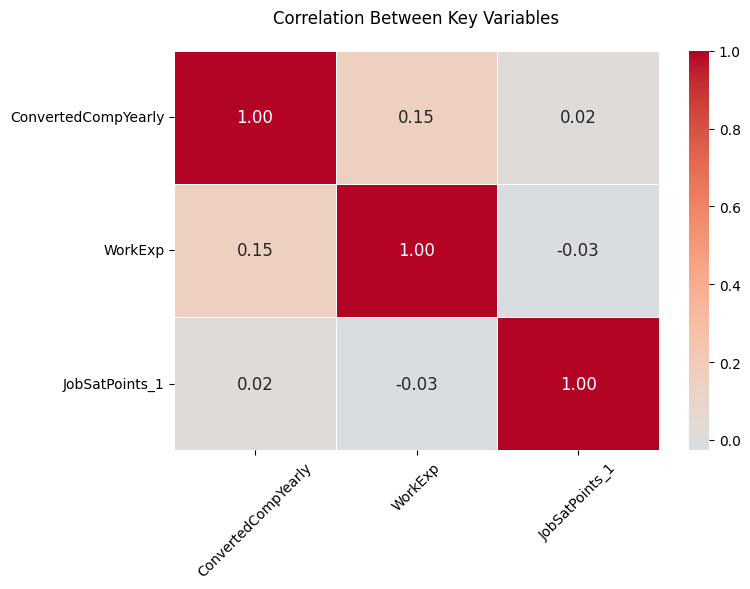

Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.154114        0.020306
WorkExp                         0.154114  1.000000       -0.026490
JobSatPoints_1                  0.020306 -0.026490        1.000000


In [9]:
# First ensure columns are numeric
df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']] = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
corr_matrix = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].corr()

# Visualize with heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, annot_kws={'size': 12})
plt.title('Correlation Between Key Variables', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print correlation values
print("Correlation Matrix:")
print(corr_matrix)

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [ ]:
plt.figure(figsize=(14, 6))

# Scatter plot: Compensation vs Work Experience
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='WorkExp', y='ConvertedCompYearly', alpha=0.6)
plt.title('Compensation vs Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Yearly Compensation (USD)')

# Add regression line
sns.regplot(data=df, x='WorkExp', y='ConvertedCompYearly', 
            scatter=False, color='red', line_kws={'linewidth': 2})

# Scatter plot: Compensation vs Job Satisfaction
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.6)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Yearly Compensation (USD)')

# Add regression line
sns.regplot(data=df, x='JobSatPoints_1', y='ConvertedCompYearly', 
            scatter=False, color='red', line_kws={'linewidth': 2})

plt.tight_layout()
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
